In [1]:
#preparing the IMDB data

from keras.datasets import imdb
from keras.preprocessing import sequence

#numbers of words to consider as features
max_features = 10000
#cuts off texts after 500 words
maxlen = 500
batch_size = 32

#loading data
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

#padding sequences
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
#building a model

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split=0.2)

W0408 18:49:49.485374 16920 deprecation_wrapper.py:119] From C:\Users\heikkila.SYSTEM-EXE\anaconda3\envs\tensorflowcpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0408 18:49:49.521733 16920 deprecation_wrapper.py:119] From C:\Users\heikkila.SYSTEM-EXE\anaconda3\envs\tensorflowcpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0408 18:49:49.524724 16920 deprecation_wrapper.py:119] From C:\Users\heikkila.SYSTEM-EXE\anaconda3\envs\tensorflowcpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0408 18:49:49.660129 16920 deprecation_wrapper.py:119] From C:\Users\heikkila.SYSTEM-EXE\anaconda3\envs\tensorflowcpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 948us/step - loss: 0.6495 - acc: 0.6032 - val_loss: 0.5333 - val_acc: 0.7324
Epoch 2/10
20000/20000 [==============================] - 19s 965us/step - loss: 0.4196 - acc: 0.8170 - val_loss: 0.5935 - val_acc: 0.7176
Epoch 3/10
20000/20000 [==============================] - 20s 988us/step - loss: 0.3332 - acc: 0.8660 - val_loss: 0.3489 - val_acc: 0.8594
Epoch 4/10
20000/20000 [==============================] - 19s 939us/step - loss: 0.2281 - acc: 0.9112 - val_loss: 0.4611 - val_acc: 0.7916
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1640 - acc: 0.9397 - val_loss: 0.3753 - val_acc: 0.8654
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1060 - acc: 0.9641 - val_loss: 0.4010 - val_acc: 0.8610
Epoch 7/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.0666 - acc: 0.9791 - val_loss: 0.4621 - 

In [4]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 19s 763us/step


[0.6764732861661911, 0.82068]

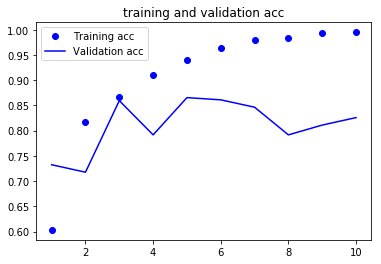

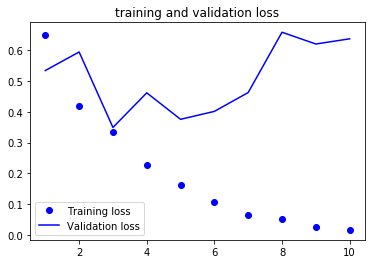

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()